In [1]:
from config import *
from util import *

In [2]:
system='LiH'
name=system
opt=''

runs=getruns(logdir)
runs=filter_paths(runs,'.*'+system+'.*'+opt+'.*')
ref=reference_energies[system]-.00004
printnotes(runs)

LiH_kfac_0.05 (reloaded from /global/scratch/users/nilin/warm_starts_10000/LiH/checkpoints/1000.npz, new optimizer state)
LiH_proxsr_0.05 (reloaded from /global/scratch/users/nilin/warm_starts_10000/LiH/checkpoints/1000.npz, new optimizer state)
LiH


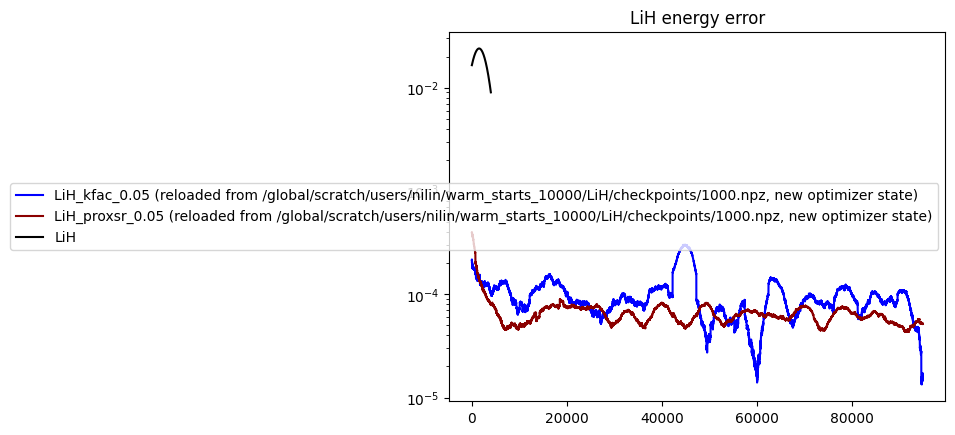

In [3]:
plotruns(logdir,runs,ref,2500)
plt.title(name+' energy error')
plt.legend()
plt.yscale('log')
savefig(plotdir,"energy_train/"+name)